In [1]:
import pandas as pd
import seaborn

In [20]:
data = pd.read_csv('Downloads/Projects/Uber Data Analysis/uber-raw-data-apr14.csv')

#Load csv file into memory

#view data 

In [21]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [22]:
dt = '4/1/2014 0:11:00'  #splitting the date and time example

In [ ]:
dt

#split the date and time

In [ ]:
d,t = dt.split(' ')

In [25]:
print(d)
print(t)

4/1/2014
0:11:00


Convert the data into python readable format

In [ ]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [27]:
data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


Add extra columns in the dataset

In [28]:
def get_dom(dt):
    return dt.day
data['dom'] = data['Date/Time'].map(get_dom)

In [29]:
data.head()

,Date/Time,Lat,Lon,Base,dom
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1


In [36]:
def get_weekday(dt):
    return dt.weekday()
data['weekday'] = data['Date/Time'].map(get_weekday)

def get_hour(dt):
    return dt.hour
data['hour'] = data['Date/Time'].map(get_hour)

In [37]:
data.head()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0


#analysis

Analyze the dates of month

In [63]:
import matplotlib.pyplot as plt

In [68]:
hist(data.dom)

Count the number of records per day of the month

In [70]:
for k, rows in data.groupby('dom'):
    print((k,len(rows)))


(1, 14546)
(2, 17474)
(3, 20701)
(4, 26714)
(5, 19521)
(6, 13445)
(7, 19550)
(8, 16188)
(9, 16843)
(10, 20041)
(11, 20420)
(12, 18170)
(13, 12112)
(14, 12674)
(15, 20641)
(16, 17717)
(17, 20973)
(18, 18074)
(19, 14602)
(20, 11017)
(21, 13162)
(22, 16975)
(23, 20346)
(24, 23352)
(25, 25095)
(26, 24925)
(27, 14677)
(28, 15475)
(29, 22835)
(30, 36251)


In [74]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

dom
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

In [86]:
plt.plot(by_date)


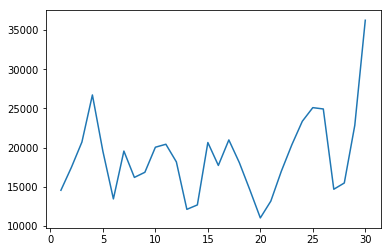

In [87]:
plt.show()

In [88]:
plt.bar(range(1, 31), by_date)

<Container object of 30 artists>

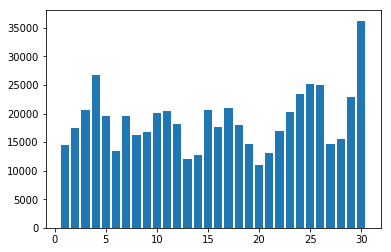

In [89]:
plt.show()

In [90]:
by_date_sorted = by_date.sort_values()
by_date_sorted

dom
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

Analyze the day of month, sorted ascendingly according to the frequencies

In [103]:
plt.bar(range(1, 31), by_date_sorted)
plt.xticks(range(1,31), by_date_sorted.index)
;
plt.xlabel('date of the month')
plt.ylabel('frequency')
plt.title('Frequency by DOM - uber - April 2014')


Text(0.5,1,'Frequency by DOM - uber - April 2014')

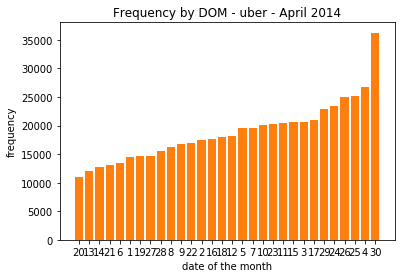

In [104]:
plt.show()



In [ ]:
Analyze the hours 

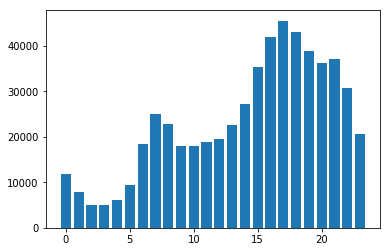

In [159]:
plt.hist(data.hour, bins=24, rwidth=0.8, range=[-.5,23.5])
plt.show()

In [163]:
plt.hist(data.weekday, bins=7, range=[-.5, 6.5], rwidth=0.5, align='mid', normed='true', color='green')
plt.xticks(range(7), 'Mon Tues Wed Thurs Fri Sat Sun'.split())


([<matplotlib.axis.XTick at 0x1a12aa08d0>,
 <a list of 7 Text xticklabel objects>)

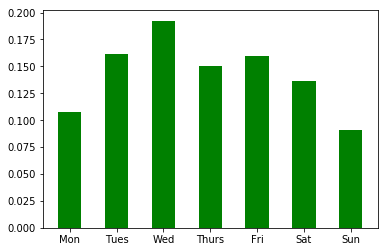

In [164]:
plt.show()

In [167]:
data.groupby('weekday hour'.split()).apply(count_rows).unstack()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


In [172]:
plt.hist()

,Date/Time,Lat,Lon,Base,dom,weekday,hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0
5,2014-04-01 00:33:00,40.7383,-74.0403,B02512,1,1,0
6,2014-04-01 00:39:00,40.7223,-73.9887,B02512,1,1,0
7,2014-04-01 00:45:00,40.7620,-73.9790,B02512,1,1,0
8,2014-04-01 00:55:00,40.7524,-73.9960,B02512,1,1,0
9,2014-04-01 01:01:00,40.7575,-73.9846,B02512,1,1,1


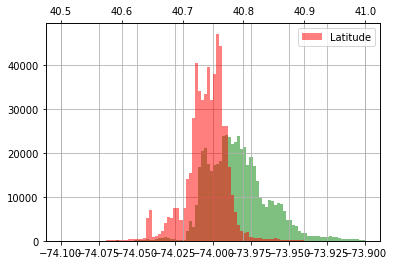

In [196]:
plt.hist(data.Lon, bins=100, range = [-74.1,-73.9], color='g', alpha=.5, label='Longitude')
plt.grid()
plt.twiny()
plt.legend(loc='upper left')
plt.hist(data.Lat, bins=100, range = [40.5,41], color='r', alpha=.5, label='Latitude')
plt.grid()
plt.legend(loc='upper right')
plt.show()
